In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project Root:", project_root)
print("Exists:", os.path.exists(project_root))
print("In Path:", project_root in sys.path)


Project Root: /Users/setayesh/Desktop/projects/python_projects/ai-race-engineer
Exists: True
In Path: True


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

from src.data.load_data import load_session
from src.data.compare import compare_drivers_corner_level


/Users/setayesh/Desktop/projects/python_projects/ai-race-engineer/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
session = load_session(2023, "Silverstone", "Q")

driver_a = "VER"
driver_b = "PER"

corner_comp = compare_drivers_corner_level(session, driver_a, driver_b)
corner_comp


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


,Corner,VER_EntrySpeed,VER_ApexSpeed,VER_ExitSpeed,VER_SpeedLoss,VER_SpeedGain,VER_AvgBrake,VER_AvgThrottle,VER_ThrottleBelow30Pct,PER_EntrySpeed,...,PER_AvgThrottle,PER_ThrottleBelow30Pct,Delta_ApexSpeed,Delta_EntrySpeed,Delta_ExitSpeed,Delta_SpeedLoss,Delta_SpeedGain,Delta_AvgBrake,Delta_AvgThrottle,Delta_ThrottleBelow30Pct
0,1,302.0,94.0,279.0,208.0,185.0,0.205479,68.479452,0.260274,297.0,...,65.440000,0.306667,1.0,5.0,-2.0,4.0,-3.0,0.005479,3.039452,-0.046393
1,2,283.0,114.0,301.0,169.0,187.0,0.172414,74.977011,0.206897,286.0,...,69.259259,0.271605,6.0,-3.0,7.0,-9.0,1.0,-0.012771,5.717752,-0.064708
2,3,295.0,226.0,317.0,69.0,91.0,0.044776,90.253731,0.059701,285.0,...,89.407407,0.074074,17.0,10.0,16.0,-7.0,-1.0,-0.004607,0.846324,-0.014373
3,4,318.0,99.0,256.0,219.0,157.0,0.181818,68.597403,0.285714,198.0,...,61.896552,0.310345,5.0,120.0,2.0,115.0,-3.0,-0.025078,6.700851,-0.024631


In [ ]:
from src.insights.text_engine import generate_corner_text_insights

insights = generate_corner_text_insights(corner_comp, "VER", "PER")

for line in insights:
    print("•", line)


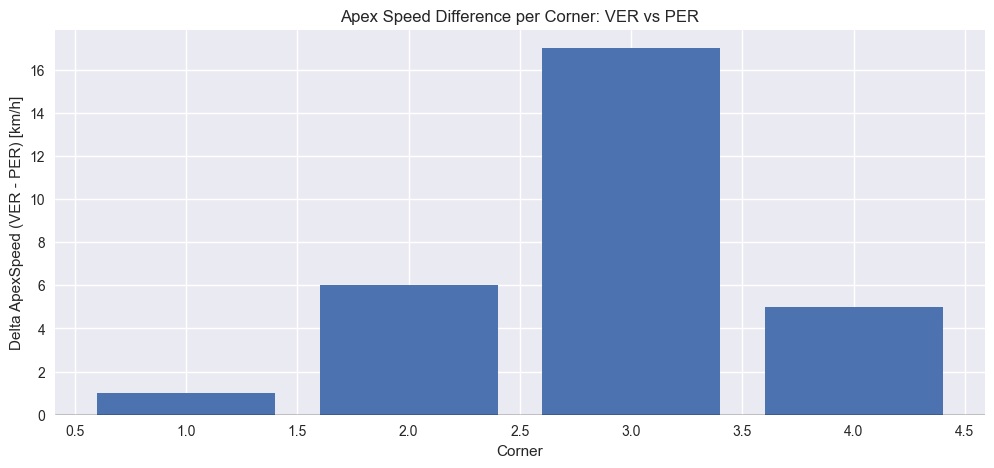

In [5]:
plt.figure(figsize=(12,5))
plt.bar(corner_comp["Corner"], corner_comp["Delta_ApexSpeed"])
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Corner")
plt.ylabel(f"Delta ApexSpeed ({driver_a} - {driver_b}) [km/h]")
plt.title(f"Apex Speed Difference per Corner: {driver_a} vs {driver_b}")
plt.grid(True)
plt.show()


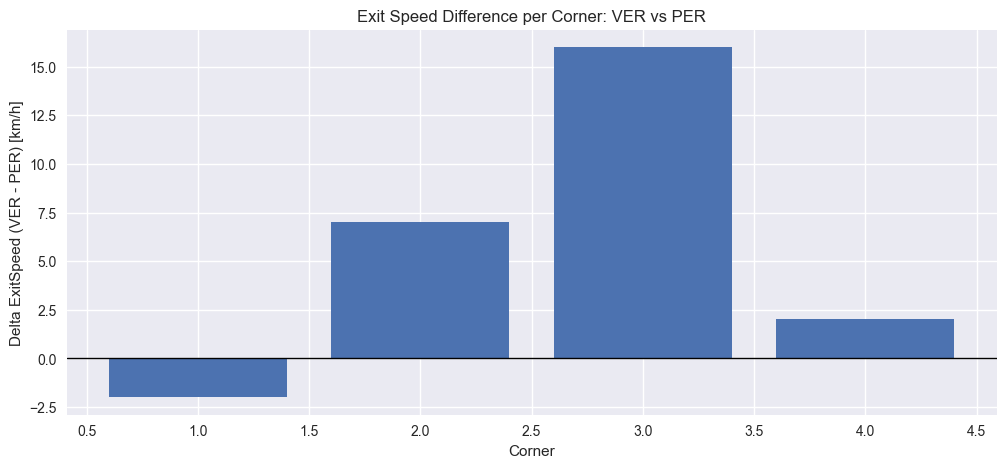

In [6]:
plt.figure(figsize=(12,5))
plt.bar(corner_comp["Corner"], corner_comp["Delta_ExitSpeed"])
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Corner")
plt.ylabel(f"Delta ExitSpeed ({driver_a} - {driver_b}) [km/h]")
plt.title(f"Exit Speed Difference per Corner: {driver_a} vs {driver_b}")
plt.grid(True)
plt.show()


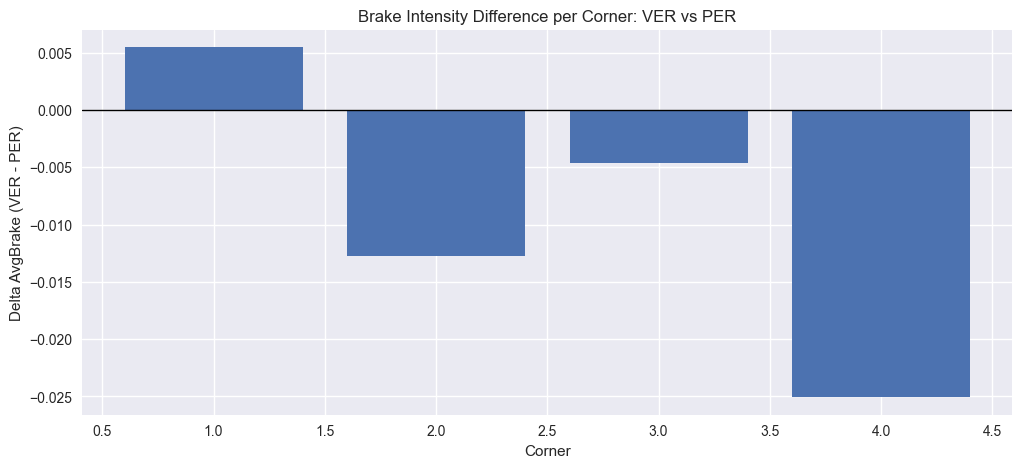

In [7]:
plt.figure(figsize=(12,5))
plt.bar(corner_comp["Corner"], corner_comp["Delta_AvgBrake"])
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Corner")
plt.ylabel(f"Delta AvgBrake ({driver_a} - {driver_b})")
plt.title(f"Brake Intensity Difference per Corner: {driver_a} vs {driver_b}")
plt.grid(True)
plt.show()


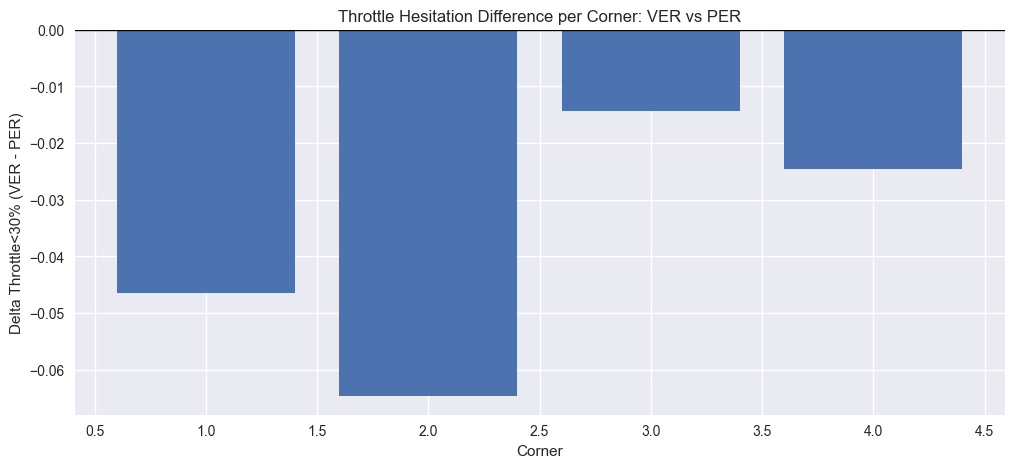

In [8]:
plt.figure(figsize=(12,5))
plt.bar(corner_comp["Corner"], corner_comp["Delta_ThrottleBelow30Pct"])
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Corner")
plt.ylabel(f"Delta Throttle<30% ({driver_a} - {driver_b})")
plt.title(f"Throttle Hesitation Difference per Corner: {driver_a} vs {driver_b}")
plt.grid(True)
plt.show()


In [9]:
problem_corners = corner_comp.sort_values("Delta_ExitSpeed")  # stark negativ: VER viel besser
problem_corners.head(5)


,Corner,VER_EntrySpeed,VER_ApexSpeed,VER_ExitSpeed,VER_SpeedLoss,VER_SpeedGain,VER_AvgBrake,VER_AvgThrottle,VER_ThrottleBelow30Pct,PER_EntrySpeed,...,PER_ThrottleBelow30Pct,Delta_ApexSpeed,Delta_EntrySpeed,Delta_ExitSpeed,Delta_SpeedLoss,Delta_SpeedGain,Delta_AvgBrake,Delta_AvgThrottle,Delta_ThrottleBelow30Pct,ImpactScore
0,1,302.0,94.0,279.0,208.0,185.0,0.205479,68.479452,0.260274,297.0,...,0.306667,1.0,5.0,-2.0,4.0,-3.0,0.005479,3.039452,-0.046393,10.5
3,4,318.0,99.0,256.0,219.0,157.0,0.181818,68.597403,0.285714,198.0,...,0.310345,5.0,120.0,2.0,115.0,-3.0,-0.025078,6.700851,-0.024631,131.5
1,2,283.0,114.0,301.0,169.0,187.0,0.172414,74.977011,0.206897,286.0,...,0.271605,6.0,-3.0,7.0,-9.0,1.0,-0.012771,5.717752,-0.064708,26.0
2,3,295.0,226.0,317.0,69.0,91.0,0.044776,90.253731,0.059701,285.0,...,0.074074,17.0,10.0,16.0,-7.0,-1.0,-0.004607,0.846324,-0.014373,67.5


In [10]:
strong_corners_per = corner_comp.sort_values("Delta_ExitSpeed", ascending=False)
strong_corners_per.head(5)


,Corner,VER_EntrySpeed,VER_ApexSpeed,VER_ExitSpeed,VER_SpeedLoss,VER_SpeedGain,VER_AvgBrake,VER_AvgThrottle,VER_ThrottleBelow30Pct,PER_EntrySpeed,...,PER_ThrottleBelow30Pct,Delta_ApexSpeed,Delta_EntrySpeed,Delta_ExitSpeed,Delta_SpeedLoss,Delta_SpeedGain,Delta_AvgBrake,Delta_AvgThrottle,Delta_ThrottleBelow30Pct,ImpactScore
2,3,295.0,226.0,317.0,69.0,91.0,0.044776,90.253731,0.059701,285.0,...,0.074074,17.0,10.0,16.0,-7.0,-1.0,-0.004607,0.846324,-0.014373,67.5
1,2,283.0,114.0,301.0,169.0,187.0,0.172414,74.977011,0.206897,286.0,...,0.271605,6.0,-3.0,7.0,-9.0,1.0,-0.012771,5.717752,-0.064708,26.0
3,4,318.0,99.0,256.0,219.0,157.0,0.181818,68.597403,0.285714,198.0,...,0.310345,5.0,120.0,2.0,115.0,-3.0,-0.025078,6.700851,-0.024631,131.5
0,1,302.0,94.0,279.0,208.0,185.0,0.205479,68.479452,0.260274,297.0,...,0.306667,1.0,5.0,-2.0,4.0,-3.0,0.005479,3.039452,-0.046393,10.5
